<a href="https://colab.research.google.com/github/Alamein/Machine-Learning-ML-Projects/blob/main/dog_breed_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using `TensorFlow 2.18.0` and `TensorFlow Hub`.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I am sitting at the University/Faculty compound and I take a  photo of a dog, I want to know what breed of dog it is.

## 2. Data

The Data We're using is from kaggle's dog breed identification competition.

Click [here](https://www.kaggle.com/c/dog-breed-identification/data) to take a look of the dataset in kaggle.

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

Click [here](https://www.kaggle.com/c/dog-breed-identification/overview) to see more on the evaluation.

## 4. Features

Some information about the data:
* We're dealing with images (Unstructured Data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 differents classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (These images have no labels, because we'll want to predict them).

In [1]:
#Unzip the uploaded data into Google Drive
# !unzip "drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision"

### Get our workspace ready
* Import `TensorFlow 2.18.0`
* Import `TensosorFlow Hub`
* Make sure we are using `GPU`

In [ ]:
# Incase if you have not find tensorflow version 2.18.0 try runing this code

# try:
  # %tensorflow_version 2.x only exist in colab
  #%tensorflow_version 2.x

# except Exception:
#   pass

In [2]:
# Import TensorFlow and necessary tools into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version:", hub.__version__)

# Check for GPU availabilty
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TensorFlow Version: 2.18.0
TensorFlow Hub Version: 0.16.1
GPU available (YESSSS!!!!!)


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representation).

Let's start by accessing our data and check out the labels.

In [3]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [5]:
labels_csv['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

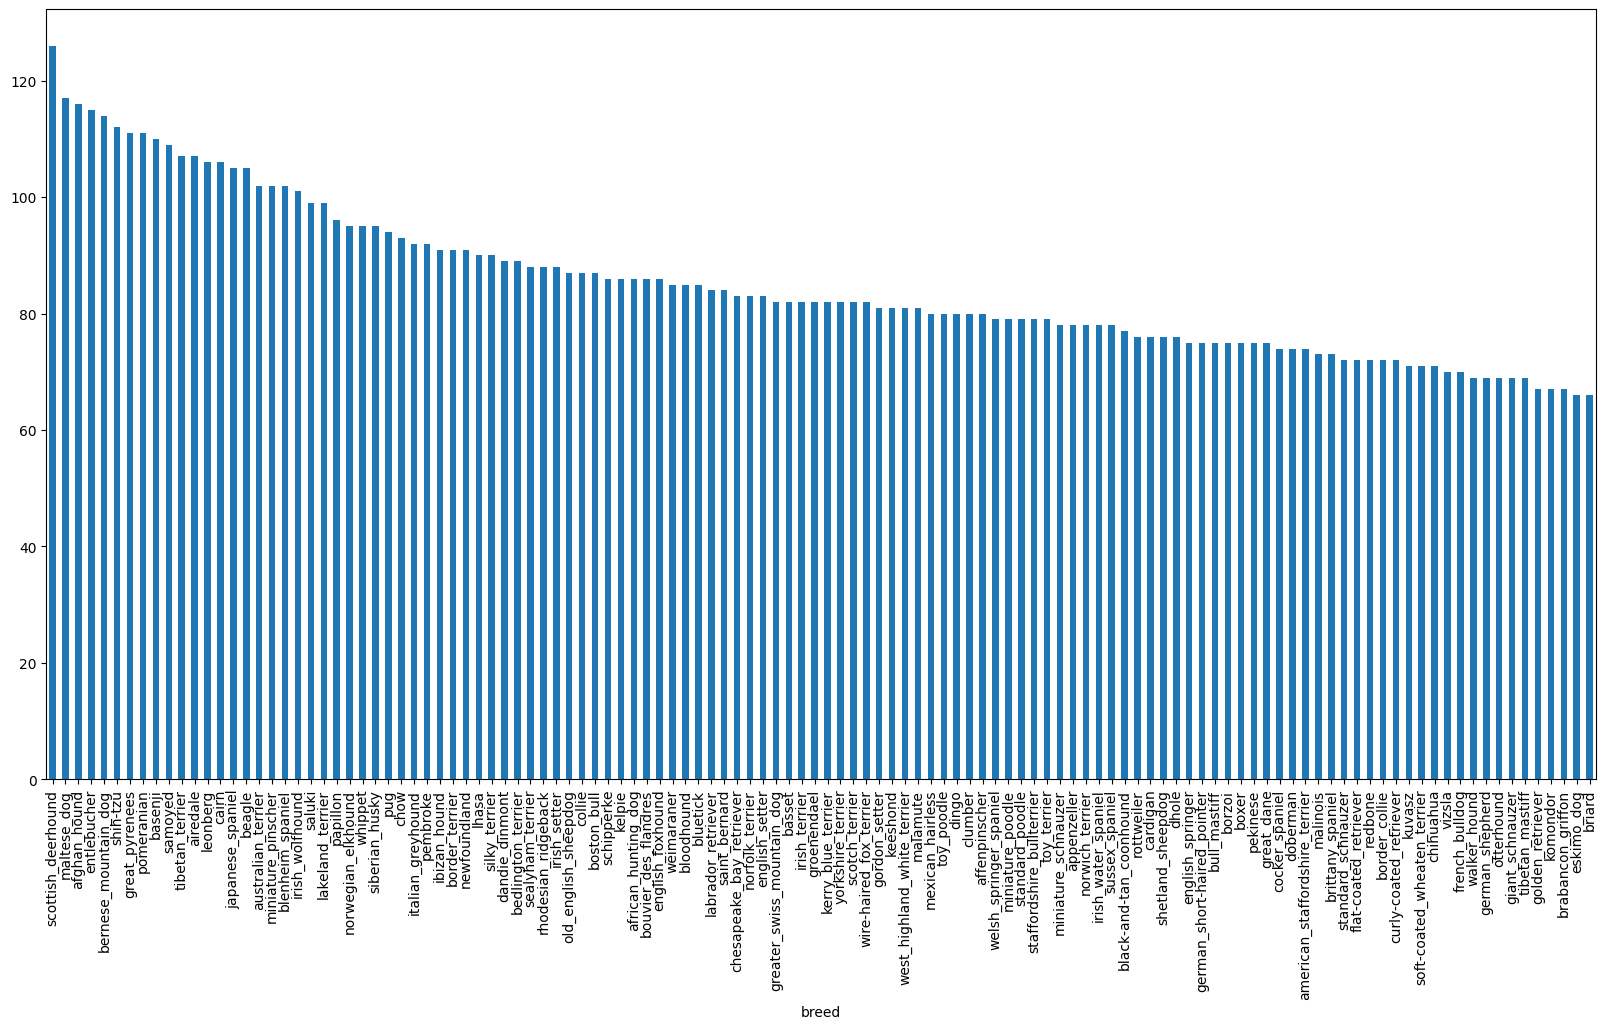

In [6]:
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

In [7]:
labels_csv.breed.value_counts().median()

82.0

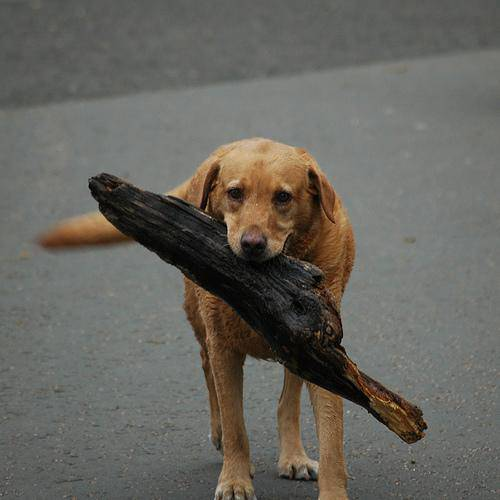

In [8]:
from IPython.display import Image
Image("drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg")

In [9]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
# Create pathname from immages id's
filenames = ["drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/" + flname + ".jpg" for flname in labels_csv['id']]

# Check the first 10
filenames[:10]

['drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data Science Work Env/AL

In [11]:
# Check wether the filename match the actual number of files in the train folder
import os

if len(os.listdir("drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train")) == len(filenames):
  print("Filenames match actual number of files Proceed!.")
else:
  print("Filenames do not match actual number of files, check the selected directory!")

Filenames match actual number of files Proceed!.


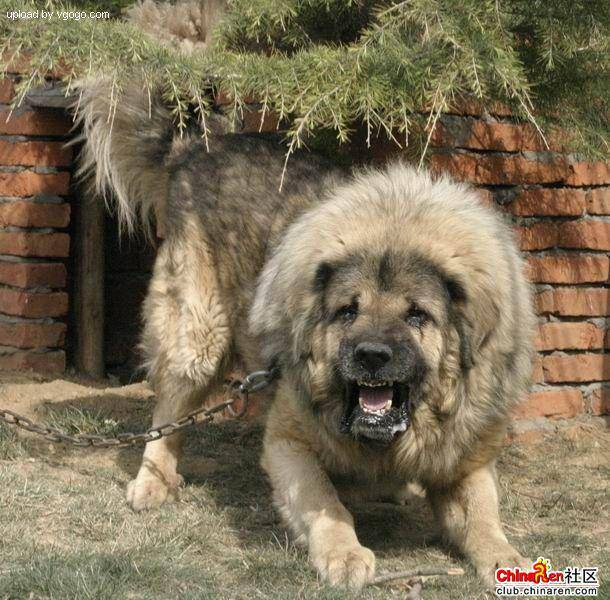

In [12]:
Image(filenames[9000])

In [13]:
labels_csv.breed[9000]

'tibetan_mastiff'

Since we've now got our training images filepath in a list, let's prepare our labels.


In [14]:
labels = labels_csv['breed'].to_numpy()
#or
# labels = np.array(labels) does same thing as above code by importing numpy
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [16]:
# See if number of labels matchs number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames, Proceed!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames, Proceed!


In [17]:
# Find the unique labels value
import numpy as np
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [18]:
#or
unique_breed = pd.Series(labels).unique()
unique_breed

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [19]:
unique_breeds[:10]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle'], dtype=object)

In [20]:
len(unique_breeds)

120

In [21]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [22]:
# Turn a single label into array of booleans
print(labels[0])

labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
len(labels)

10222

In [24]:
# Turn every labels into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [25]:
# Example: Turning boolean array into integers
print(labels[0]) # Original label
print(np.where(unique_breeds == labels[0])) # Index where label occurs
print(boolean_labels[0].argmax()) # Index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # There will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [26]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [27]:
filenames[:10]

['drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data Science Work Env/AL

In [28]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating our own validation set

Since the dataset from kaggle doesn't come with validation set, we're going to create our own.

In [29]:
# Setup X and y variables
X = filenames
y = boolean_labels

In [30]:
X[:12]

['drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data Science Work Env/AL

In [31]:
y[:12]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [32]:
len(boolean_labels)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

In [33]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000, step: 1000}

In [34]:
# Let's Split our data into train and validation set
from sklearn.model_selection import train_test_split

#split into train and validation with NUM_IMAGES as the highest range
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

# checck each size
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [35]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False,

## Preprocessing Images (turning images into `Tensors`)


To preprocess our images into Tensors we're going to write a function wich does a few things:

1. Take an `image` filepath as an input.
2. Use `TensorsFlow` to read the file and save to a variable, `image`.
3. Turn our `image` (a jpg) into Tensors.
4. Resize the `image` to be a shape of (224, 224).
5. Return the modified `image`.


Before we do, let's see what importing an image look like

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
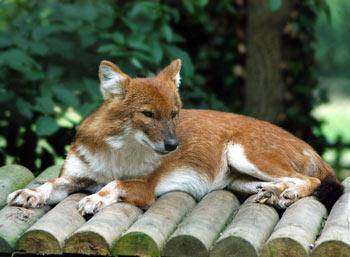

In [36]:
# convert image into numpy array
from matplotlib.pyplot import imread

image = imread(filenames[42])
image

In [37]:
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
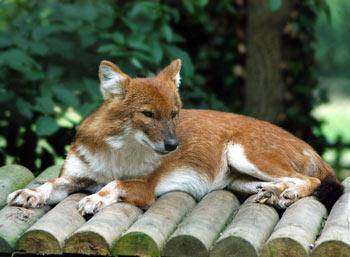

In [38]:
image

In [39]:
image.max(), image.min()

(np.uint8(255), np.uint8(0))

In [40]:
# Turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.


1. Take an `image` filepath as an input.
2. Use `TensorsFlow` to read the file and save to a variable, `image`.
3. Turn our `image` (a jpg) into Tensors.
4. Resize the `image` to be a shape of (224, 224).
5. Return the modified `image`.

In [41]:
# Define image size
IMAGE_SIZE = 224


# Create a function for preprocessing images

def preprocess_image(image_path, img_size=IMAGE_SIZE):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensors with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value
  image = tf.image.resize(image, size=[img_size, img_size])

  # return image
  return image

## Turning our data into batches

Why turn our data into batches?


Let's say your trying to process 10,000+ in one go...they all might not fit into memory.

So that's why we do about 32 (this is the batch size) immages at a time (you can manually adjust the batch size if neede be).


In order to use TensorFlow effectively, we need our data in the form of Tensor tuple which look like this:
`(image, label)`.

In [42]:
# Create a simple function to a tuple (image, label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """

  image = preprocess_image(image_path)

  return image, label

In [43]:
(preprocess_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensor in the form: `(image, label)` let's make a function to turn all of our data (X & y) into batches!.

In [44]:
# Define the batch size, 32 is the good start

BATCH_SIZE = 32

# create a function to turn data into bathces
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """

  # if data is test dataset we probably don't have labels
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only file path (no labels)

    data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is valid dataset we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # file pathe
                                               tf.constant(y))) # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn file path and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # file path
                                               tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))


    # create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [45]:
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [46]:
# check out the different attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little to understand/comprehend, let's visualize them!

In [47]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(12, 13))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # create subplots (5, rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    # plt.axis("off")

In [48]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [49]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.25910342, 0.26643908, 0.22482425],
          [0.27215442, 0.27979693, 0.23726156],
          [0.27849382, 0.27754843, 0.23886032],
          ...,
          [0.32081464, 0.2776774 , 0.30904993],
          [0.31769085, 0.27514887, 0.28904933],
          [0.31769085, 0.27847517, 0.28239673]],
 
         [[0.25105777, 0.25497934, 0.22668873],
          [0.25094327, 0.25486484, 0.22476366],
          [0.25977597, 0.2587868 , 0.22848743],
          ...,
          [0.33373597, 0.29059872, 0.32197127],
          [0.33734244, 0.29480046, 0.30870092],
          [0.33734244, 0.29812676, 0.30204833]],
 
         [[0.26763076, 0.27052057, 0.25324756],
          [0.2584034 , 0.26191705, 0.24248599],
          [0.27093256, 0.2660656 , 0.24999127],
          ...,
          [0.3466503 , 0.30351305, 0.3348856 ],
          [0.34778538, 0.30483547, 0.3199597 ],
          [0.34778538, 0.30588236, 0.3178659 ]],
 
         ...,
 
         [[0.30802968, 0.30802968, 0.30018654],
          [0.26419

In [50]:
len(train_images), len(train_labels)

(32, 32)

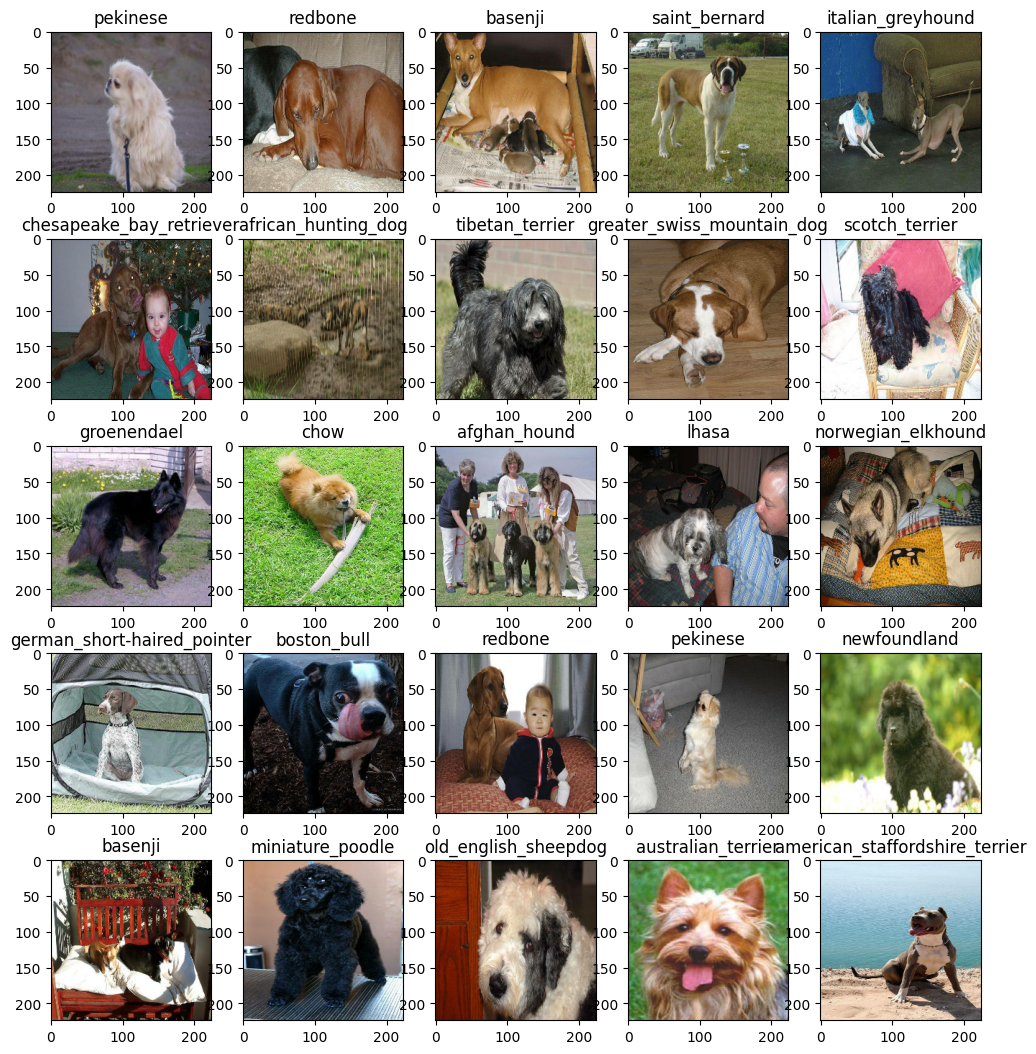

In [51]:
# Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

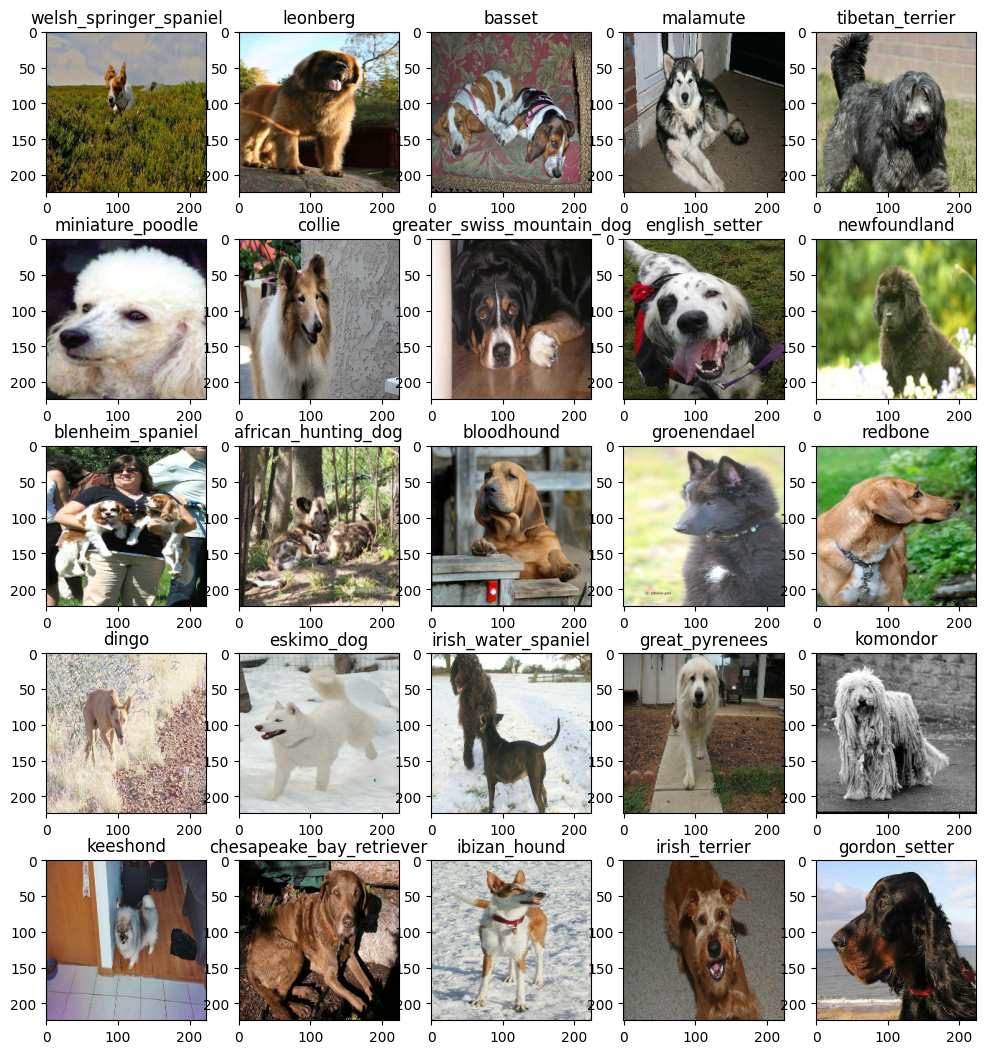

In [52]:
#Let's see the shuffled set
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

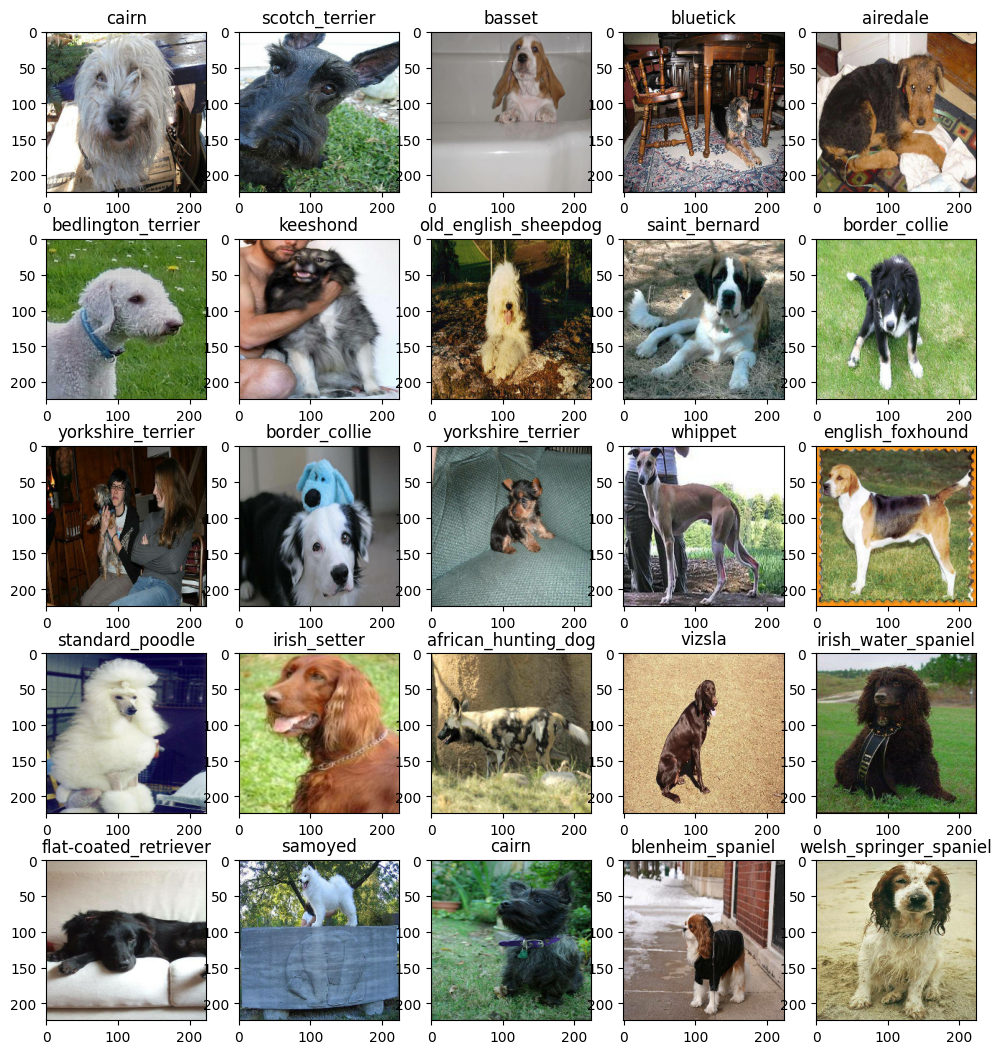

In [53]:
# Now let's visualize our validation set
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [54]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [55]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

## Building a model


Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use

In [56]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup Model URL from TensorFlow Hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

a = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

Now we've got inputs, outputs and model ready to go. Let's put them together into a keras deep learning model!


Knowing this, lets's create a function which:
* Takes the input shape, output shape the model we've chosen as parameters.
* Defines the layer in keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (syas it should be evaluated and improved).
* Builds the model (tells the model the input shape it 'll be getting).
* Returns the model.


All of this steps can be found [here](https://www.tensorflow.org/hub/overview)


In [ ]:
# # Create a function which builds a keras model
# def create_model(input_shape=INPUT_SHAPE, out_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#   print("Building model with:", MODEL_URL)
#   # Setup the model layers
#   model = tf.keras.Sequential([
#       hub.KerasLayer(MODEL_URL),
#       tf.keras.layers.Dense(units=OUTPUT_SHAPE,
#                             activation="softmax")
#   ])


#   # Compile the model
#   model.compile(
#       loss=tf.keras.losses.CategoricalCrossentropy(),
#       optimizer=tf.keras.optimizers.Adam(),
#       metrics=["accuracy"]
#   )

#   # Build the model
#   model.build(INPUT_SHAPE)

#   # Return the model
#   return model

In [70]:
# Load TensorBoard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [71]:
# !pip install tf_keras

import tf_keras as tfk

In [82]:
# a function for model creation
def create_model(input_shape=INPUT_SHAPE, out_shape=OUTPUT_SHAPE, model_url=a):
    print("Building model with:", a)

    # setup the model
    model = tfk.Sequential([
        hub.KerasLayer(a),
                       tfk.layers.Dense(units=OUTPUT_SHAPE, activation='softmax')
                       ])

    # compile the model
    model.compile(
        loss=tfk.losses.CategoricalCrossentropy(),
        optimizer=tfk.optimizers.Adam(),
        metrics=['accuracy']
    )

    # build the model
    model.build(INPUT_SHAPE)

    return model

In [83]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_5 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating Callbacks

Callbacks are helper functions a model can use during training to do such thing as save its progress, check its progress, or stop training early if a model stop improving.

We'll create two callbacks, one for TensorBoard which helps track our model progress and another for early stopping which prevents our model from tarining for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need  to do 3 three things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our `fit()` function.
3. Visualize our models training logs with the %tensorboard magic function(We'll do this after model training).

In [84]:
# # Load TensorBoard Extension
# %load_ext tensorboard

In [85]:
import datetime

# Define the TensorBoard callback function
def create_tf_callback():
    # create a log directory for storing TensorBoard logs
    logdir = os.path.join('drive/MyDrive/Data Science Work Env/AL-AMIN-ML-PROJECTS/Supervised-ML-Projects/Deep-Learning-Projects/Dog Vision/logs',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

# # Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)



### Early stopping callback

Early stopping callback helps stop our model from overfitting by stopping training if a certain evaluation metrics stop improving

In [86]:
# # Early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                                   patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [87]:
NUM_EPOCHS = 100 #@param {type: "slider", min:10, max:100, step:10}

In [88]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YESSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSSS!!!!)


Let's create a function which trains a model

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tf_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for `NUM_EPOCHS` and the callbacks we'd like to use.
* Return the model

In [89]:
# Build a function to train and return a trained model

def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tf_callback()

  # Fit the model to the data passing it the callback we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  # Returned the fitted model
  return model

In [96]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x782543d41810> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)